In [31]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("splcher/animefacedataset")

print("Path to dataset files:", path)

d:\Semester6\AI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 395M/395M [03:26<00:00, 2.00MB/s] 

Extracting files...


Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\splcher\animefacedataset\versions\3


INFO:__main__:Loading image file paths and labels…


INFO:__main__:Found 5000 images belonging to 5 classes.
INFO:__main__:Building tf.data datasets…
INFO:__main__:Datasets → train: 3,999  val: 501  test: 500
INFO:__main__:Building base model…
C:\Users\hp\AppData\Local\Temp\ipykernel_13500\631214775.py:100: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(
d:\Semester6\AI\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
INFO:__main__:Starting initial training (base frozen)…


Epoch 1/20
125/125 - 42s - 333ms/step - accuracy: 0.2816 - loss: 1.6833 - val_accuracy: 0.3094 - val_loss: 1.5554
Epoch 2/20
125/125 - 26s - 206ms/step - accuracy: 0.3171 - loss: 1.5378 - val_accuracy: 0.3174 - val_loss: 1.5394
Epoch 3/20
125/125 - 40s - 323ms/step - accuracy: 0.3298 - loss: 1.5118 - val_accuracy: 0.3373 - val_loss: 1.5134
Epoch 4/20
125/125 - 23s - 187ms/step - accuracy: 0.3496 - loss: 1.4831 - val_accuracy: 0.3373 - val_loss: 1.5068
Epoch 5/20
125/125 - 23s - 181ms/step - accuracy: 0.3513 - loss: 1.4752 - val_accuracy: 0.3653 - val_loss: 1.5018
Epoch 6/20
125/125 - 28s - 225ms/step - accuracy: 0.3726 - loss: 1.4609 - val_accuracy: 0.3473 - val_loss: 1.5020
Epoch 7/20
125/125 - 27s - 220ms/step - accuracy: 0.3698 - loss: 1.4467 - val_accuracy: 0.3553 - val_loss: 1.5040
Epoch 8/20
125/125 - 24s - 195ms/step - accuracy: 0.3851 - loss: 1.4336 - val_accuracy: 0.3573 - val_loss: 1.4923
Epoch 9/20
125/125 - 25s - 202ms/step - accuracy: 0.3878 - loss: 1.4247 - val_accuracy: 

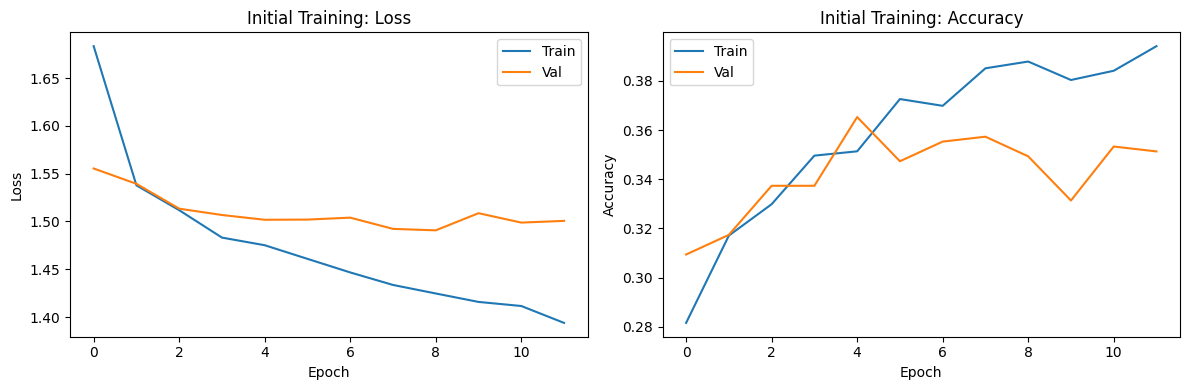

INFO:__main__:Fine-tuning full model…


Epoch 1/10
125/125 - 36s - 292ms/step - accuracy: 0.3911 - loss: 1.4080 - val_accuracy: 0.3533 - val_loss: 1.4906
Epoch 2/10
125/125 - 23s - 182ms/step - accuracy: 0.4136 - loss: 1.3972 - val_accuracy: 0.3553 - val_loss: 1.4905
Epoch 3/10
125/125 - 26s - 206ms/step - accuracy: 0.3948 - loss: 1.4020 - val_accuracy: 0.3573 - val_loss: 1.4903
Epoch 4/10
125/125 - 27s - 218ms/step - accuracy: 0.4066 - loss: 1.3939 - val_accuracy: 0.3533 - val_loss: 1.4903
Epoch 5/10
125/125 - 29s - 228ms/step - accuracy: 0.4054 - loss: 1.4001 - val_accuracy: 0.3573 - val_loss: 1.4904
Epoch 6/10
125/125 - 26s - 211ms/step - accuracy: 0.4104 - loss: 1.3958 - val_accuracy: 0.3553 - val_loss: 1.4901
Epoch 7/10
125/125 - 29s - 229ms/step - accuracy: 0.4109 - loss: 1.3935 - val_accuracy: 0.3533 - val_loss: 1.4901
Epoch 8/10
125/125 - 27s - 214ms/step - accuracy: 0.4106 - loss: 1.3906 - val_accuracy: 0.3493 - val_loss: 1.4902
Epoch 9/10
125/125 - 23s - 185ms/step - accuracy: 0.4046 - loss: 1.3954 - val_accuracy: 

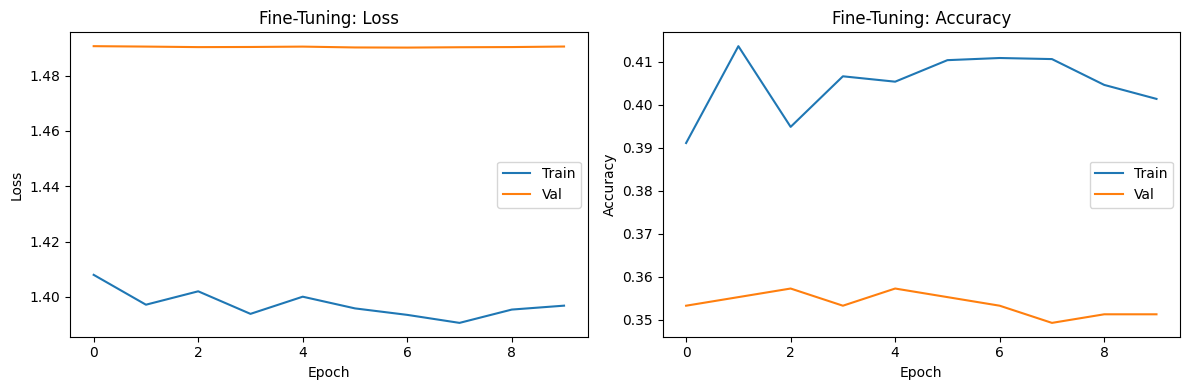

INFO:__main__:Evaluating on test set…
INFO:__main__:Test   loss=1.5367   accuracy=0.3000


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step


INFO:__main__:Classification Report:
              precision    recall  f1-score   support

    fighting       0.31      0.32      0.32       100
       indie       0.23      0.34      0.28       100
    platform       0.29      0.30      0.29       100
      puzzle       0.29      0.16      0.21       100
       sport       0.42      0.38      0.40       100

    accuracy                           0.30       500
   macro avg       0.31      0.30      0.30       500
weighted avg       0.31      0.30      0.30       500



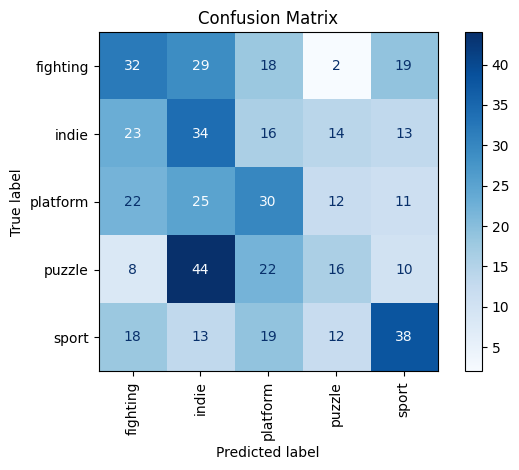

INFO:__main__:Final model saved to ./models\game_cover_model.keras
INFO:__main__:Total time: 626.04s


In [41]:
import os
import time
import logging
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# ───────────────────────────
# User-configurable parameters
# ───────────────────────────
DATA_DIR = "./dataset"
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20
FINE_TUNE_EPOCHS = 10
TEST_SIZE = 0.10
VAL_SIZE = 0.10
RANDOM_STATE = 42
MODEL_DIR = "./models"
os.makedirs(MODEL_DIR, exist_ok=True)

# ───────────────────────────
# Logging setup
# ───────────────────────────
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


def load_image_paths_and_labels(data_dir):
    classes = sorted(
        [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    )
    filepaths = []
    labels = []
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        for fname in os.listdir(class_dir):
            if fname.lower().endswith((".jpg", ".jpeg", ".png")):
                filepaths.append(os.path.join(class_dir, fname))
                labels.append(class_name)
    logger.info(f"Found {len(filepaths)} images belonging to {len(classes)} classes.")
    return filepaths, labels, classes


def make_datasets(filepaths, labels):
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)

    fp_trainval, fp_test, lb_trainval, lb_test = train_test_split(
        filepaths,
        labels_encoded,
        test_size=TEST_SIZE,
        stratify=labels_encoded,
        random_state=RANDOM_STATE,
    )

    val_fraction = VAL_SIZE / (1 - TEST_SIZE)
    fp_train, fp_val, lb_train, lb_val = train_test_split(
        fp_trainval,
        lb_trainval,
        test_size=val_fraction,
        stratify=lb_trainval,
        random_state=RANDOM_STATE,
    )

    def make_ds(fps, lbs, shuffle=False):
        ds = tf.data.Dataset.from_tensor_slices((fps, lbs))
        if shuffle:
            ds = ds.shuffle(buffer_size=len(fps), seed=RANDOM_STATE)

        def _load_and_preprocess(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_image(img, channels=3, expand_animations=False)
            img = tf.image.resize(img, IMG_SIZE)
            return img, label  # no manual normalization here

        ds = ds.map(_load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = make_ds(fp_train, lb_train, shuffle=True)
    val_ds = make_ds(fp_val, lb_val, shuffle=False)
    test_ds = make_ds(fp_test, lb_test, shuffle=False)

    num_classes = len(le.classes_)
    np.save(os.path.join(MODEL_DIR, "class_names.npy"), le.classes_)

    return train_ds, val_ds, test_ds, num_classes, le.classes_, lb_train


def build_model(num_classes, train_base=False):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(*IMG_SIZE, 3), include_top=False, weights="imagenet"
    )
    base_model.trainable = train_base

    model = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(*IMG_SIZE, 3)),
            tf.keras.layers.Rescaling(1.0 / 255),  # centralized normalization
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            tf.keras.layers.RandomZoom(0.1),
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model


def plot_history(history, title="Training History"):
    plt.figure(figsize=(12, 4))
    for i, metric in enumerate(["loss", "accuracy"]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.history[metric], label="Train")
        plt.plot(history.history[f"val_{metric}"], label="Val")
        plt.title(f"{title}: {metric.capitalize()}")
        plt.xlabel("Epoch")
        plt.ylabel(metric.capitalize())
        plt.legend()
    plt.tight_layout()
    plt.show()


def main():
    start = time.time()
    logger.info("Loading image file paths and labels…")
    filepaths, labels, classes = load_image_paths_and_labels(DATA_DIR)

    logger.info("Building tf.data datasets…")
    train_ds, val_ds, test_ds, num_classes, class_names, lb_train = make_datasets(
        filepaths, labels
    )

    total_train = sum(1 for _ in train_ds.unbatch())
    total_val = sum(1 for _ in val_ds.unbatch())
    total_test = sum(1 for _ in test_ds.unbatch())
    logger.info(
        f"Datasets → train: {total_train:,}  val: {total_val:,}  test: {total_test:,}"
    )

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight="balanced", classes=np.unique(lb_train), y=lb_train
    )
    class_weights = dict(enumerate(class_weights))

    logger.info("Building base model…")
    model = build_model(num_classes, train_base=False)
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
        tf.keras.callbacks.ModelCheckpoint(
            os.path.join(MODEL_DIR, "best_game_cover_model.keras"), save_best_only=True
        ),
    ]

    logger.info("Starting initial training (base frozen)…")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=2,
    )
    plot_history(history, title="Initial Training")

    logger.info("Fine-tuning full model…")
    model.layers[5].trainable = True  # Unfreeze base model

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history_fine = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=FINE_TUNE_EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=2,
    )
    plot_history(history_fine, title="Fine-Tuning")

    logger.info("Evaluating on test set…")
    loss, acc = model.evaluate(test_ds, verbose=0)
    logger.info(f"Test   loss={loss:.4f}   accuracy={acc:.4f}")

    y_true = np.concatenate([y for _, y in test_ds], axis=0)
    y_probs = model.predict(test_ds)
    y_pred = np.argmax(y_probs, axis=1)

    logger.info(
        "Classification Report:\n"
        + classification_report(y_true, y_pred, target_names=class_names)
    )

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues", xticks_rotation=90)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    final_path = os.path.join(MODEL_DIR, "game_cover_model.keras")
    model.save(final_path)
    logger.info(f"Final model saved to {final_path}")

    logger.info(f"Total time: {time.time() - start:.2f}s")


if __name__ == "__main__":
    main()

In [ ]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.1 MB 3.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 3.3 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.7 MB/s eta 0:00:03
   ---------------------- ----------------- 6.3/11.1 MB 2.7 MB/s eta 0:00:02
   ----------